Create a random dataset of 100 rows and 30 columns, all the values are defined
between [1,200] and perform the following operations:

1. Replace all the values with NA in the dataset defined between [10,60]. Print
the count of NAss in each row and each column.
2. Replace all the NA values with the average of the column values.
3. Plot heat map.
4. Count the number of columns having correlation <=0.7
5. Normalize each column in the dataset between 0 and 10.
6. Replace all the values in the dataset with 0 if value <=5 else with 1. 4.
Visualizing the distribution of a dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Create random dataset
np.random.seed(42)
data = np.random.randint(1, 201, size=(100, 30))
df = pd.DataFrame(data, columns=[f"col_{i+1}" for i in range(30)])

# Replace values between [10, 60] with NaN
df = df.mask((df >= 10) & (df <= 60))

In [3]:
# Count NAs in each row and each column
print("Count of NAs per Row:\n", df.isna().sum(axis=1))
print("\nCount of NAs per Column:\n", df.isna().sum(axis=0))

# 2. Replace NA values with column mean
df_filled = df.fillna(df.mean())

Count of NAs per Row:
 0      7
1     11
2      8
3      9
4      8
      ..
95    10
96     9
97     9
98     7
99    10
Length: 100, dtype: int64

Count of NAs per Column:
 col_1     23
col_2     22
col_3     21
col_4     18
col_5     26
col_6     28
col_7     23
col_8     27
col_9     21
col_10    17
col_11    26
col_12    24
col_13    23
col_14    28
col_15    23
col_16    34
col_17    31
col_18    31
col_19    34
col_20    20
col_21    24
col_22    26
col_23    23
col_24    31
col_25    27
col_26    26
col_27    31
col_28    27
col_29    31
col_30    31
dtype: int64


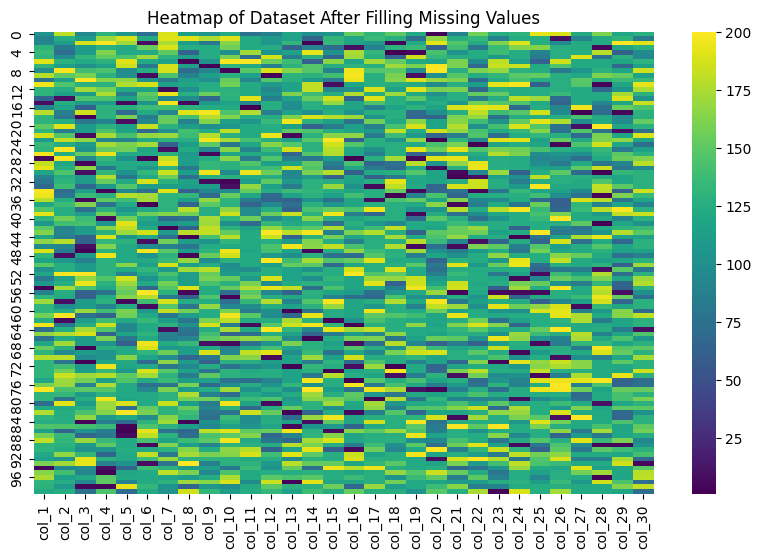

In [4]:
# 3. Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_filled, cmap="viridis")
plt.title("Heatmap of Dataset After Filling Missing Values")
plt.show()

In [5]:
# 4. Count the number of column correlations <= 0.7
corr_matrix = df_filled.corr()
corr_count = (corr_matrix <= 0.7).sum().sum()
print("\nNumber of correlations <= 0.7:", corr_count)


Number of correlations <= 0.7: 870


In [6]:
# 5. Normalize each column between 0 and 10
df_normalized = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10

# 6. Replace all values with 0 if <=5 else 1
df_binary = df_normalized.applymap(lambda x: 0 if x <= 5 else 1)

/tmp/ipython-input-794258808.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 0 if x <= 5 else 1)


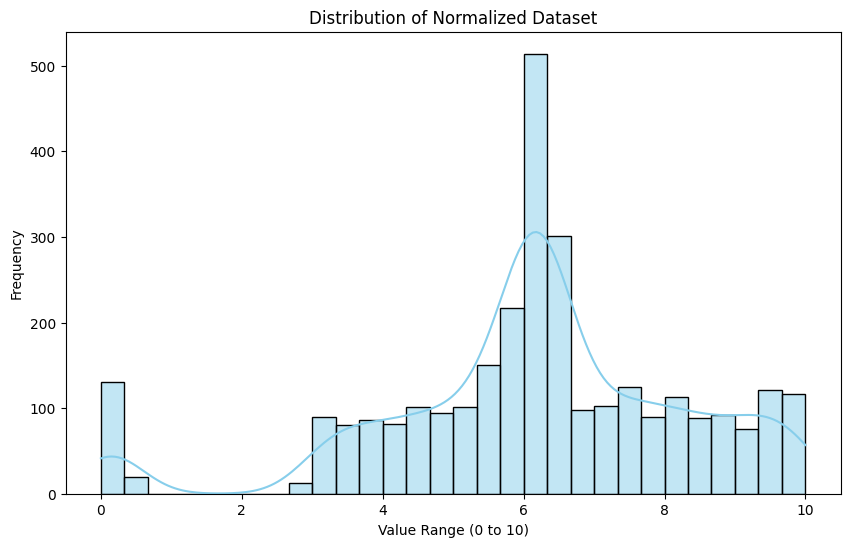

In [7]:
# 7. Visualize distribution of dataset
plt.figure(figsize=(10, 6))
sns.histplot(df_normalized.values.flatten(), bins=30, kde=True, color="skyblue")
plt.title("Distribution of Normalized Dataset")
plt.xlabel("Value Range (0 to 10)")
plt.ylabel("Frequency")
plt.show()